In [1]:
import pandas as pd

df = pd.read_csv('../data/export.csv', low_memory=False)
df

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
0,QEVuQwEABlEzkh7fsBBjEe26RyIVcg==,NaN,NaN,NaN,2015-11-26,1069,Condition,Ulcerative colitis,0
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,32.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,2.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4
...,...,...,...,...,...,...,...,...,...
7976218,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,1,Tag,tired,NaN
7976219,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,2,Tag,stressed,NaN
7976220,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9002,Food,soup,NaN
7976221,QEVuQwEAtlfm8VyoxZ9biWjDHb74gQ==,22.0,female,GB,2019-12-04,9139,Food,yogurt,NaN


In [2]:
# drop rows with duplicate user_id
df_unique = df.drop_duplicates(subset=['user_id'])
for i in df_unique.columns:
    print(i)
    print(df_unique[i].describe())
    print()

user_id
count                                42283
unique                               42283
top       QEVuQwEABlEzkh7fsBBjEe26RyIVcg==
freq                                     1
Name: user_id, dtype: object

age
count     40604.000000
mean         28.239361
std         981.488705
min     -196691.000000
25%          25.000000
50%          32.000000
75%          41.000000
max        2018.000000
Name: age, dtype: float64

sex
count      40996
unique         4
top       female
freq       34659
Name: sex, dtype: object

country
count     39550
unique      164
top          US
freq      23550
Name: country, dtype: object

checkin_date
count          42283
unique          1461
top       2017-10-08
freq             173
Name: checkin_date, dtype: object

trackable_id
count     42283
unique     4455
top         397
freq       2287
Name: trackable_id, dtype: object

trackable_type
count         42283
unique            7
top       Condition
freq          36903
Name: trackable_type, dtype: object


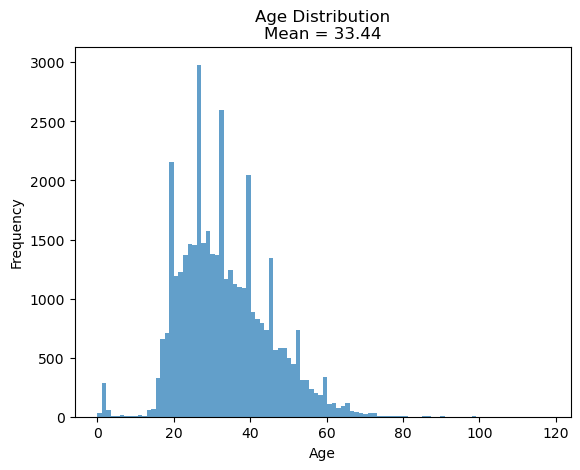

In [3]:
import matplotlib.pyplot as plt

# Filter valid ages for plotting
filtered = df_unique[(df_unique['age'] >= 0) & (df_unique['age'] <= 120)]

# Plot histogram
ax = filtered['age'].plot.hist(bins=100, alpha=0.7)

# Compute mean and median
mean_age = filtered['age'].mean()

# Add legend and labels
plt.title(f'Age Distribution\nMean = {mean_age:.2f}')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('../results/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

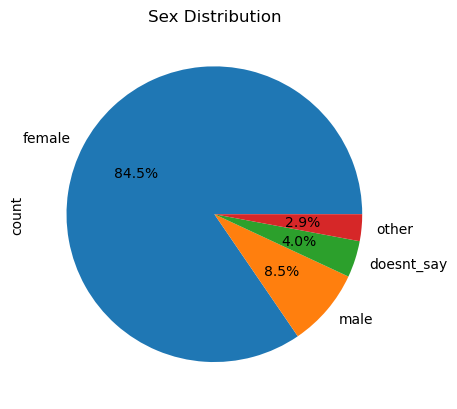

In [4]:
# plot pie chart of sex column
df_unique['sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.savefig('../results/sex_distribution.png', dpi=300, bbox_inches='tight')

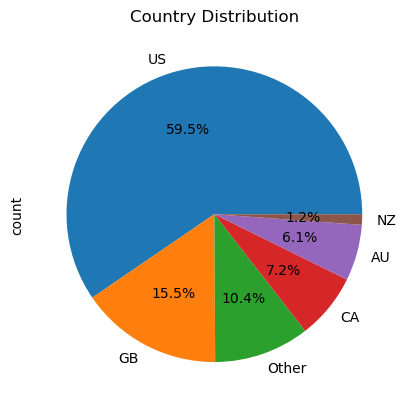

In [5]:
# replace couuntry names that appear less than 1 percent with "Other"
country_counts = df_unique['country'].value_counts(normalize=True)
countries_to_other = country_counts[country_counts < 0.01].index
df_unique.loc[:, 'country'] = df_unique['country'].replace(countries_to_other, 'Other')
df_unique['country'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Country Distribution')
plt.savefig('../results/country_distribution.png', dpi=300, bbox_inches='tight')

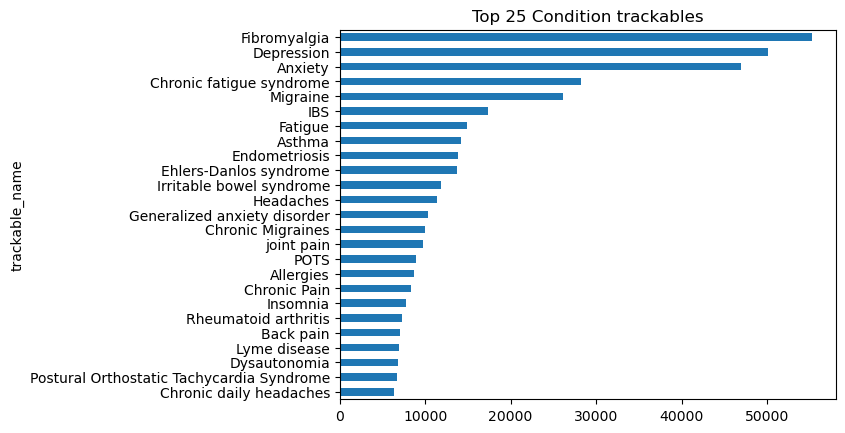

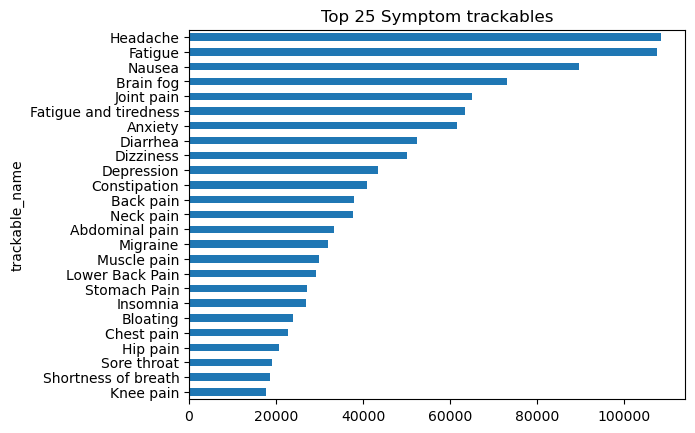

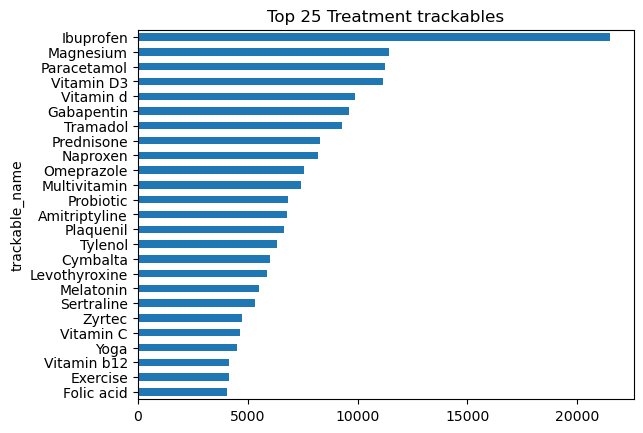

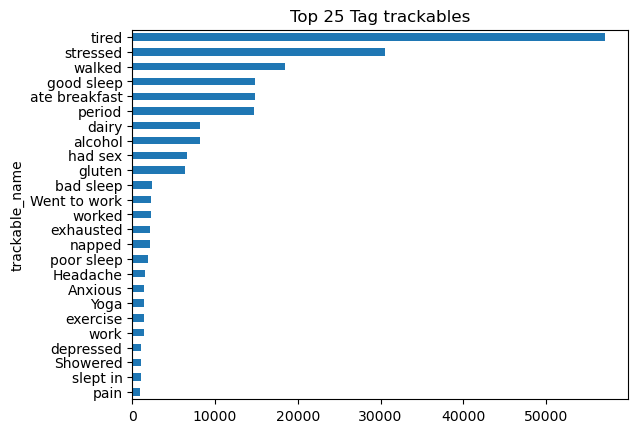

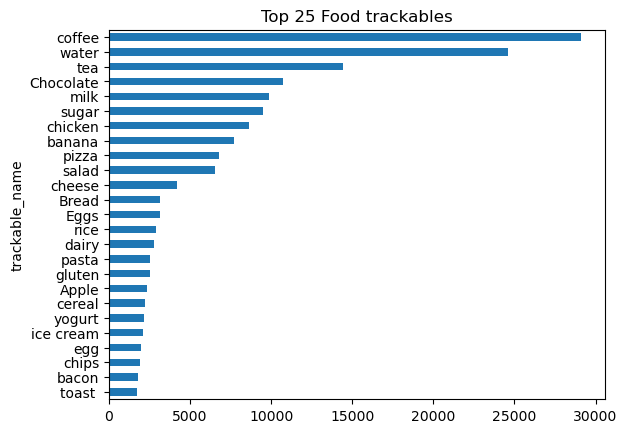

In [6]:
# plot distribution of trackable types
top = 25
for i in df['trackable_type'].unique():
    if i == 'HBI' or i == 'Weather':
        continue

    trackables = df[df['trackable_type'] == i]['trackable_name']
    trackables.value_counts().head(top).plot.barh(title=f'Top {top} {i} trackables')
    plt.gca().invert_yaxis()
    plt.savefig(f'../results/top_{top}_{i}_trackables.png', dpi=300, bbox_inches='tight')
    plt.show()

# plot eda as subplots for 2 figs

user_id
count                                42283
unique                               42283
top       QEVuQwEABlEzkh7fsBBjEe26RyIVcg==
freq                                     1
Name: user_id, dtype: object

age
count     40604.000000
mean         28.239361
std         981.488705
min     -196691.000000
25%          25.000000
50%          32.000000
75%          41.000000
max        2018.000000
Name: age, dtype: float64

sex
count      40996
unique         4
top       female
freq       34659
Name: sex, dtype: object

country
count     39550
unique      164
top          US
freq      23550
Name: country, dtype: object

checkin_date
count          42283
unique          1461
top       2017-10-08
freq             173
Name: checkin_date, dtype: object

trackable_id
count     42283
unique     4455
top         397
freq       2287
Name: trackable_id, dtype: object

trackable_type
count         42283
unique            7
top       Condition
freq          36903
Name: trackable_type, dtype: object


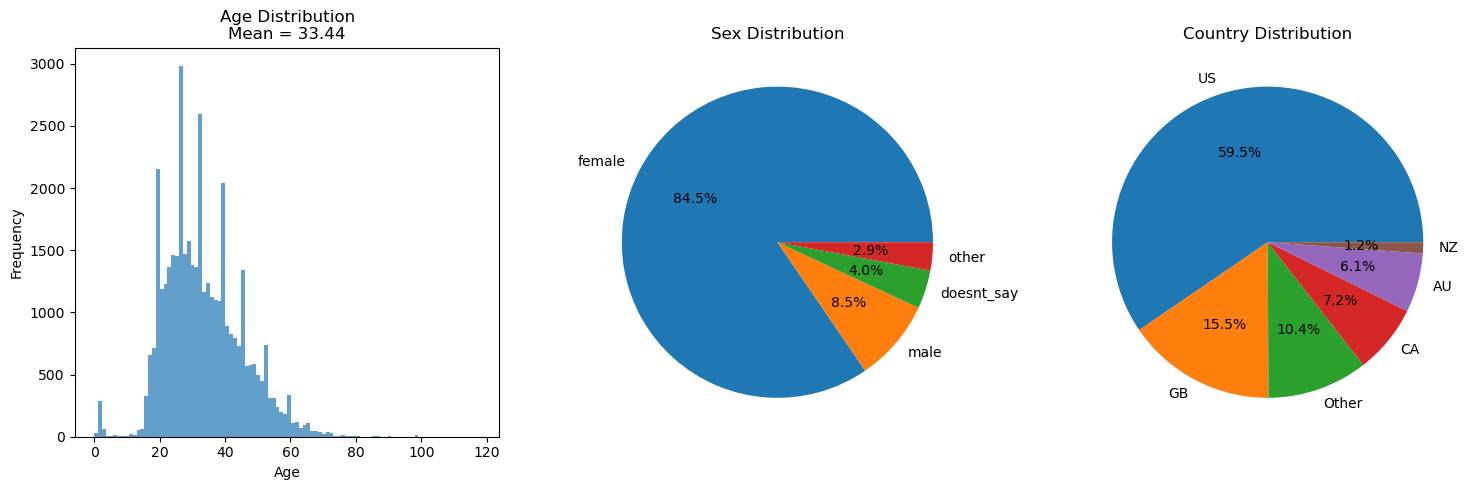

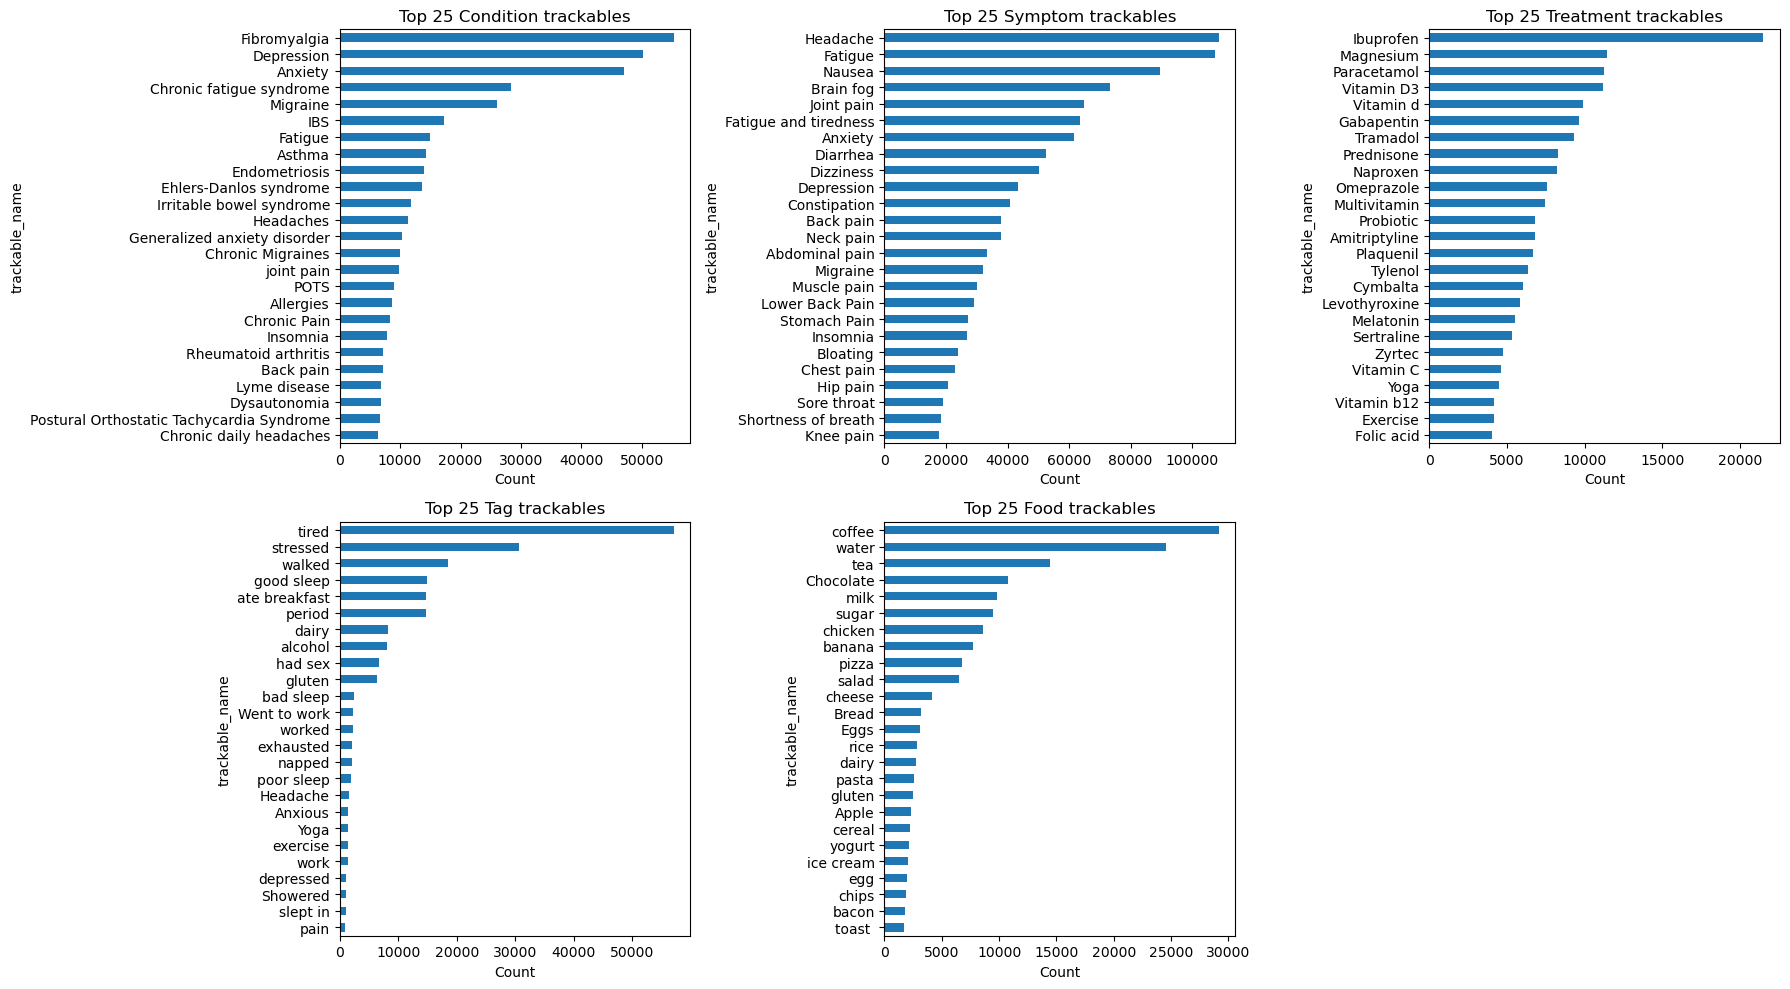

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# ==============================
# LOAD + BASIC DERIVED DATA
# ==============================
df = pd.read_csv('../data/export.csv', low_memory=False)
# drop rows with duplicate user_id
df_unique = df.drop_duplicates(subset=['user_id'])

# (optional) print describe
for i in df_unique.columns:
    print(i)
    print(df_unique[i].describe())
    print()

# ==============================
# FIGURE 1: AGE / SEX / COUNTRY
# ==============================

# Filter valid ages for plotting
filtered = df_unique[(df_unique['age'] >= 0) & (df_unique['age'] <= 120)]

# replace country names that appear less than 1 percent with "Other"
country_counts = df_unique['country'].value_counts(normalize=True)
countries_to_other = country_counts[country_counts < 0.01].index
df_unique.loc[:, 'country'] = df_unique['country'].replace(countries_to_other, 'Other')

fig1, axes = plt.subplots(1, 3, figsize=(15, 5))

# --- Age histogram ---
ax = axes[0]
filtered['age'].plot.hist(bins=100, alpha=0.7, ax=ax)
mean_age = filtered['age'].mean()
ax.set_title(f'Age Distribution\nMean = {mean_age:.2f}')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')

# --- Sex pie ---
ax = axes[1]
df_unique['sex'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
ax.set_ylabel('')
ax.set_title('Sex Distribution')

# --- Country pie ---
ax = axes[2]
df_unique['country'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
ax.set_ylabel('')
ax.set_title('Country Distribution')

plt.tight_layout()
plt.savefig('../results/demographics_age_sex_country.png', dpi=300, bbox_inches='tight')
plt.show()

# ==============================
# FIGURE 2: TOP-25 TRACKABLES BY TYPE
# ==============================

top = 25

# list of trackable types to plot (exclude HBI, Weather)
trackable_types = [t for t in df['trackable_type'].dropna().unique()
                   if t not in ('HBI', 'Weather')]

n_types = len(trackable_types)

# Always use 2 rows, compute columns
import math
n_rows = 2
n_cols = math.ceil(n_types / 2)

fig2, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 10), squeeze=False)

# Flatten axes for easy iteration
axes_flat = axes.flatten()

for ax, ttype in zip(axes_flat, trackable_types):
    trackables = df[df['trackable_type'] == ttype]['trackable_name']
    vc = trackables.value_counts().head(top)
    vc.plot.barh(ax=ax)
    ax.invert_yaxis()
    ax.set_title(f'Top {top} {ttype} trackables')
    ax.set_xlabel('Count')

# Hide any unused subplot axes
for ax in axes_flat[len(trackable_types):]:
    ax.set_visible(False)

plt.tight_layout()
plt.savefig('../results/top_trackables_by_type.png', dpi=300, bbox_inches='tight')
plt.show()